# Firing table

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

This example involves the kinematics of a projectile, whose dynamical relations can be described by the following differential equations

<br>

\begin{align*}
  m\dot{V} &=  -0.5\rho V^2 S C_d - mg\sin\gamma \\
  V\dot{\gamma} &= -g\cos\gamma \\
  \dot{R} &= V\cos\gamma \\
  \dot{h} &= V\sin\gamma
\end{align*}

<br>

where $V$, and $\gamma$ represents the speed and the flight path angle of the projectile, where a positive $\gamma$ implies the projectile is going up, and $\gamma=+\pi/2$ implies vertical ascend.

<center>
<img src="https://jonghank.github.io/ee370/files/projectile.png" width="600">
</center>
Throughout this problem, you can assume that the gravitational acceleration is constant, $g=9.8m/s^2$, and the air density is well approximated by the following formula.

<br>

$$
  \rho(h) = 1.225 \left(1-2.256\times 10^{-5}h \right)^{5.256}
$$

<br>

Suppose a projectile with the following specifications is launched.

- $m$: mass (=$40kg$)
- $d$: diameter (=$16cm$)
- $S$: cross-section area (=$\pi d^2/4$)
- $C_d$: drag coefficient (=$0.2$)
- $V(0)$: initial velocity (=$1000m/s$)





**(Problem 1)** For various initial launch angles, $\gamma(0) = 20,25,\dots, 65, 70$ degrees, plot the vertical trajectory (on $R-h$ plane) and the time history of the projectile's speed.

In [0]:
# your code here
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

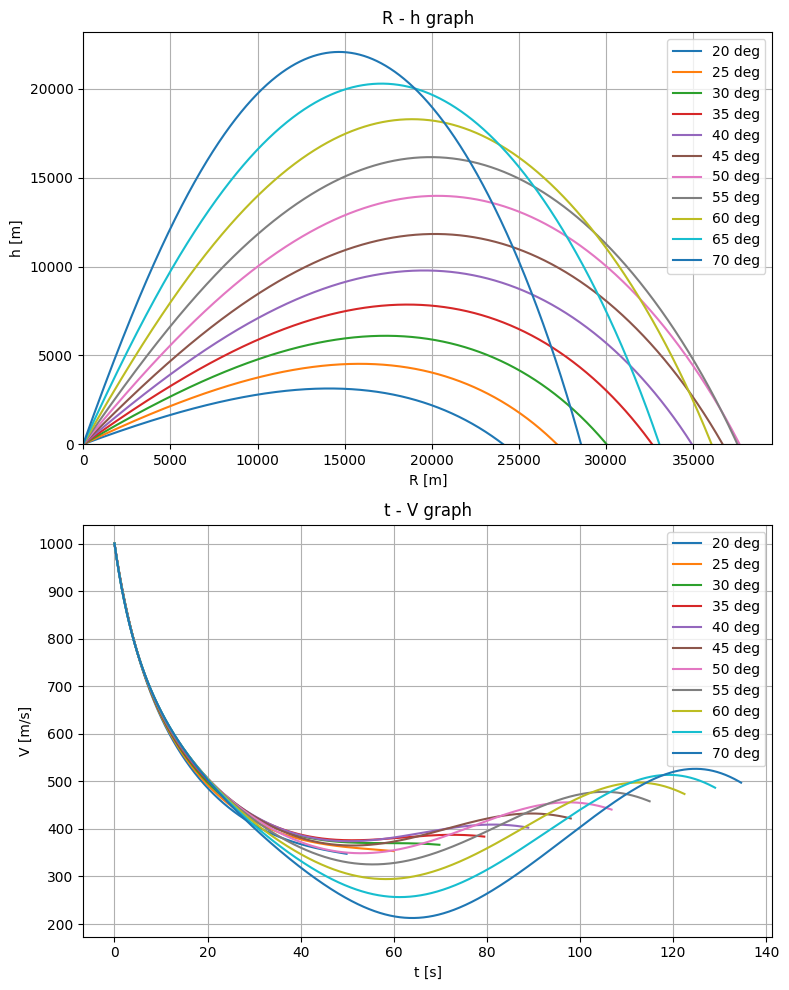

In [2]:
m = 40                    # mass
d = 0.16                  # diameter
S = np.pi*(d**2) / 4      # cross-section area
Cd = 0.2                  # drag coefficient
g = 9.8                   

# function that returns dy/dt=[hdot, vdot]
def model(z,t):                   
  V, gamma, R, h = z                                      
  rho = 1.225*(1-2.256e-5*h)**5.256                       # air density
  Vdot = (-0.5*rho*(V**2)*S*Cd - m*g*np.sin(gamma))/m     # dV/dt
  gammadot = (-g*np.cos(gamma))/V                         # dgamma/dt
  Rdot = V*np.cos(gamma)                                  # dR/dt
  hdot = V*np.sin(gamma)                                  # dh/dt
  return np.array([Vdot, gammadot, Rdot, hdot])

t = np.linspace(0,2000,100000)
states = []

plt.figure(figsize=(8,10), dpi=100)

for angle in range(20, 75, 5):
  ic = np.array([1000, angle*(np.pi/180), 0, 0])    # initial condition
  states.append([ic])

  for i in range(len(t)):
    nextValue = states[-1][-1] + (model(states[-1][-1], 0) * (2000/100000))
    if nextValue[3] < 0:
      break
    else:
      states[-1].append(nextValue)

plt.subplot(211)
plt.title('R - h graph')
for i in range(11):
  plt.plot([states[i][j][2] for j in range(len(states[i]))], [states[i][j][3] for j in range(len(states[i]))], label='{} deg'.format(20+i*5))
plt.xlim(0)
plt.ylim(0)
plt.grid(True, 'major', 'both')
plt.legend()
plt.xlabel('R [m]')
plt.ylabel('h [m]')

plt.subplot(212)
plt.title('t - V graph')
for i in range(11):
  plt.plot(list(t[:len(states[i])]), [states[i][j][0] for j in range(len(states[i]))], label='{} deg'.format(20+i*5))
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('V [m/s]')

# plot results
plt.tight_layout()
plt.grid()

**(Problem 2)** With which initial launch angle, $\gamma(0)$, should the projectile be launched, so that it reaches its maximum range? Answers upto the two most significant digits would suffice. 

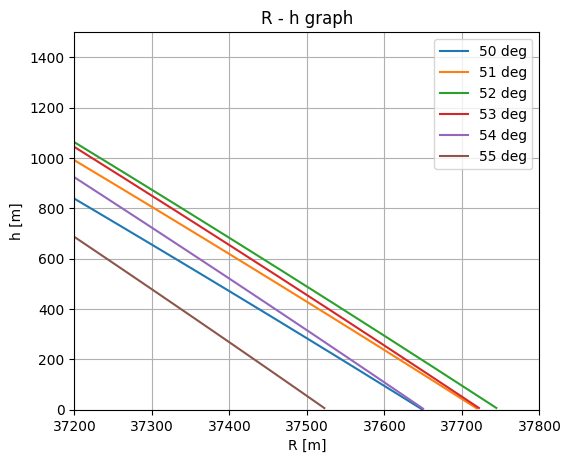

The projectile will reach its maximum range with gamma(0) = 52 degress.


In [3]:
# your code here
states2 = []
for angle in range(50, 56, 1):
  ic = np.array([1000, angle*(np.pi/180), 0, 0])    # initial condition

  states2.append([ic])
  for i in range(len(t)):
    nextValue = states2[-1][-1] + (model(states2[-1][-1], 0) * (2000/100000))
    if nextValue[3] < 0:
      break
    else:
      states2[-1].append(nextValue)

plt.figure(figsize=(6,5), dpi=100)
plt.title('R - h graph')
for i in range(6):
  plt.plot([states2[i][j][2] for j in range(len(states2[i]))], [states2[i][j][3] for j in range(len(states2[i]))], label='{} deg'.format(50+i))

plt.xlim(37200,37800)
plt.ylim(0,1500)
plt.grid(True, 'major', 'both')
plt.legend()
plt.xlabel('R [m]')
plt.ylabel('h [m]')
plt.show()

print('The projectile will reach its maximum range with gamma(0) = 52 degress.')

**(Problem 3)** Suppose you use the projectile for a parcel delivery service for your customer. Then you will probably need to make at least two modifications to your system, since the initial and the final speed of the projectile are too much high. So you decided to use a small engine, that will slowly accelerate the projectile in the beginning, and a small parachute that decelerates the projectile when it reaches the target. Your parachute deploys when $h\le 1000m$ and $\gamma\le 0$

So your model now looks like,

\begin{align*}
  m\dot{V} &= -0.5\rho V^2 S C_d - mg\sin\gamma + T \\
  V\dot{\gamma} &= -g\cos\gamma \\
  \dot{R} &= V\cos\gamma \\
  \dot{h} &= V\sin\gamma
\end{align*}

with 

$$
T =
\begin{cases}
4000N & \text{if } t \le 10  s\\
0   & \text{otherwise}
\end{cases}
$$
and
$$
C_{d}=
\begin{cases}
10    & \text{if }  \gamma\le 0 \text{ and } h\le 1000m \\
0.2   & \text{otherwise}
\end{cases}
$$

Find a sample trajectory when 

- $m$: mass (=$40kg$)
- $d$: diameter (=$16cm$)
- $S$: cross-section area (=$\pi d^2/4$)
- $V(0)$: initial velocity (=$1$)
- $\gamma(0)$: launch angle (=$50\text{deg}$)



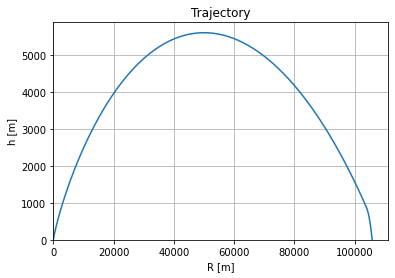

In [4]:
m = 40                    # mass
d = 0.16                  # diameter
S = np.pi*(d**2) / 4      # cross-section area
g = 9.8         

# your code here
def newModel(z,t):
  V, gamma, R, h = z        
  if t <= 10:
    T = 4000
  else:
    T = 0

  if gamma <= 0 and h <= 1000:
    Cd = 10
  else:
    Cd = 0.2
                  
  rho = 1.225*(1-2.256e-5*h)**5.256                       # air density
  Vdot = (-0.5*rho*(V**2)*S*Cd - m*g*np.sin(gamma) + T)/m     # dV/dt
  gammadot = (-g*np.cos(gamma))/V                         # dgamma/dt
  Rdot = V*np.cos(gamma)                                  # dR/dt
  hdot = V*np.sin(gamma)                                  # dh/dt
  return np.array([Vdot, gammadot, Rdot, hdot])

newT = np.linspace(0,100,10000)
newIc = np.array([1, 50*(np.pi/180), 0, 0])


states3 = [newIc]
for i in range(len(t)):
  nextValue = states3[-1] + (newModel(states3[-1], 0) * (100/10000))
  if nextValue[3] < 0:
    break
  else:
    states3.append(nextValue)

plt.plot([states3[j][2] for j in range(len(states3))], [states3[j][3] for j in range(len(states3))], label='Trajectory')

plt.title('Trajectory')
plt.xlim(0)
plt.ylim(0)
plt.grid(True, 'major', 'both')
plt.xlabel('R [m]')
plt.ylabel('h [m]')
plt.show()